# Линейная регрессия

В python задачу линейной регрессии можно решить двумя способами:

* LinearRegression - точное (аналитическое) решение задачи линейной регрессии.
* SGDRegressor - решение задачи с помощью градиентного спуска.

In [1]:
from sklearn.linear_model import LinearRegression, SGDRegressor

## Сгенерируем точки для задачи регрессии

Populating the interactive namespace from numpy and matplotlib


C:\Users\elena\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


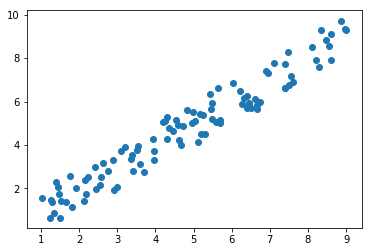

In [2]:
import random
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

num_points = 100
m, b, delta = 1, 0, 1

x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x+b-delta,m*x+b+delta) for x in x])

plt.scatter(x,y)

X = x.reshape(-1,1)

### Обучите линейную регрессию и посмотрите на результат

In [4]:
model = #define algorithm

#fit your model

y_pred = #make prediction

Нарисуем полученную регрессионную прямую.

NameError: name 'y_pred' is not defined

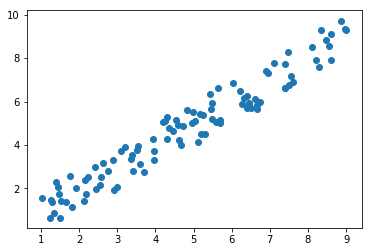

In [3]:
plt.scatter(x,y)
plt.plot(x,y_pred,'-',c='red')
plt.show()

Выведите на экран значение средней квадратичной ошибки.

In [6]:
from sklearn.metrics import mean_squared_error

#your code here

0.3451484436485219

# Задание 1: решение задачи с помощью градиентного спуска

### Посмотрим, как зависит результат от количества шагов градиентного спуска и длины градиентного шага.

Поэкспериментируйте с количеством шагов (epochs) и learning rate.
Как меняется итоговая ошибка при фиксированном числе шагов и различных learning rate?

1) Постройте графики для learning rate = 0.1, 0.01, 0.0001 и epochs = 10, 100, 1000 (всего 9 графиков).
Рядом с каждым графиком выведите ошибку (cost).

2) Прокомментируйте каждый график: ответьте на вопрос, почему вы видите именно такую прямую?

In [ ]:
#Пример для learning rate=0.1, epochs=10:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(learning_rate='constant', eta0=0.1, max_iter=10)

model.fit(X,y)
y_pred = model.predict(X)

plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,'-',color='red')
plt.show()
        
cost = mean_squared_error(y, y_pred)

print('MSE: {}'.format(cost))

learning_rate = 0.1, epochs = 10


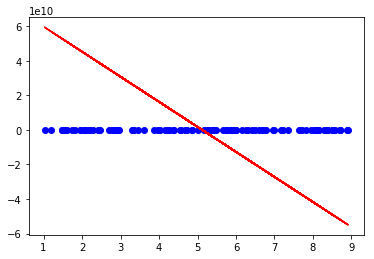

MSE: 1.1311679300568893e+21
learning_rate = 0.1, epochs = 100


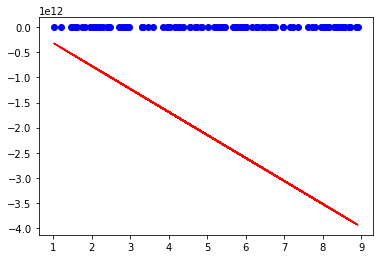

MSE: 6.092005178123375e+24
learning_rate = 0.1, epochs = 1000


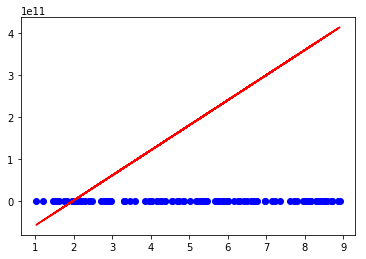

MSE: 5.552776230105506e+22
learning_rate = 0.01, epochs = 10


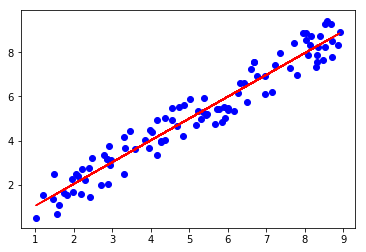

MSE: 0.3451527663035598
learning_rate = 0.01, epochs = 100


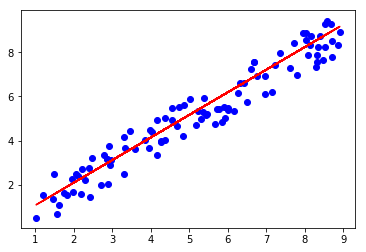

MSE: 0.38184074522348366
learning_rate = 0.01, epochs = 1000


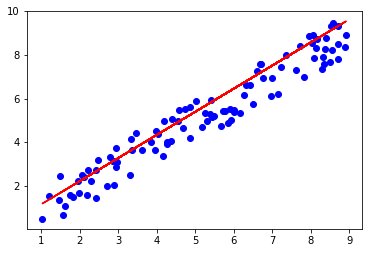

MSE: 0.5421152552457652
learning_rate = 0.0001, epochs = 10


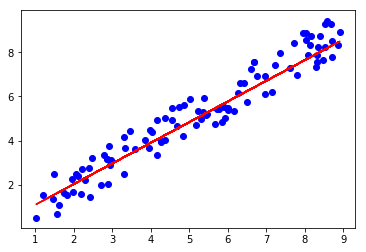

MSE: 0.3892136313162722
learning_rate = 0.0001, epochs = 100


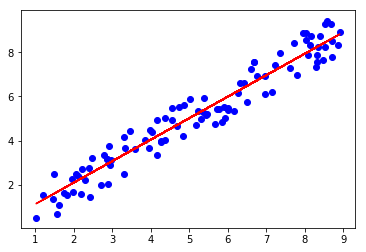

MSE: 0.3464242181174737
learning_rate = 0.0001, epochs = 1000


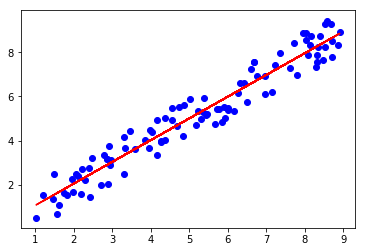

MSE: 0.3452189748868302


In [7]:
#напишите цикл для решения пункта 1) с использованием примера

#your code here

# Задание 2

Подумайте, как применить линейную регрессию для аппроксимации следующего набора точек. Решите эту задачу. Выведите на экран итоговое приближение (график) и ошибку.

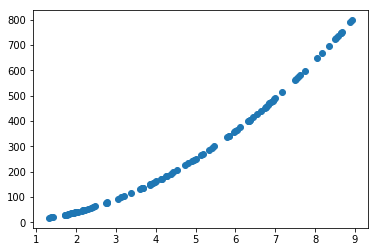

In [8]:
num_points = 100
m, b, delta = 10, 0, 1

x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x*x+b-delta,m*x*x+b+delta) for x in x])

plt.scatter(x,y)

MSE: 0.3184348223862841


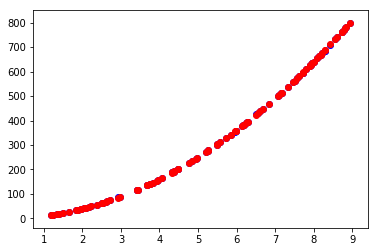

In [9]:
#your code here

# Задание 3

Считайте файл weights_heights.csv

In [10]:
df = #your code here
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Разбейте данные на тренировочную и валидационную часть.

In [11]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = #your code here (test_size = 0.2)

Обучите линейную регрессию и сделайте предсказание на трейне и на тесте. Посмотрите на качество (mse) на трейне и на тесте.

In [12]:
#your code here

101.65251720604519 101.34961477699645


### Кросс-валидация (***cross_val_score***).

Посмотрим на качество линейной регрессии на кросс-валидации с тремя фолдами.

In [13]:
from sklearn.model_selection import cross_val_score

print(-cross_val_score(lr, df[['Height']], df['Weight'], cv=3, 
                       scoring='neg_mean_squared_error').mean())

101.61260513801402


# Задание 4

Поработаем с датасетом Бостон.

In [14]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
X_full = data.data
y_full = data.target

y_full[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

Посмотрите на качество линейной регрессии (из sklearn) на кросс-валидации.

In [16]:
#your code here

169.00831238145477


Разбейте данные на train и test. Обучите линейную регрессию на train и сделайте предсказание на train и test.

Выведите MSE на train и на test.

In [17]:
#your code here

(21.86279471487961, 23.380836480270315)

In [18]:
model.coef_

array([-1.12386867e-01,  5.80587074e-02,  1.83593559e-02,  2.12997760e+00,
       -1.95811012e+01,  3.09546166e+00,  4.45265228e-03, -1.50047624e+00,
        3.05358969e-01, -1.11230879e-02, -9.89007562e-01,  7.32130017e-03,
       -5.44644997e-01])

### Корреляция.

***Коэффициент корреляции*** - это число, показывающее меру линейного влияния одной переменной на другую.
* Коэффициент корреляции лежит в диапазоне от -1 до 1.
* Если коэффициент корреляции по модулю близок к 1, то влияние сильное, если - к 0, то слабое.

Чтобы понять, насколько каждый из признаков влияет (линейно) на целевую переменную, необходимо вычислить его корреляцию с целевой переменной.

Можно вычислить корреляции всех признаков со всеми - получим ***матрицу корреляций***. Её легко интерпретировать и поэтому удобно использовать. Нарисуем её.

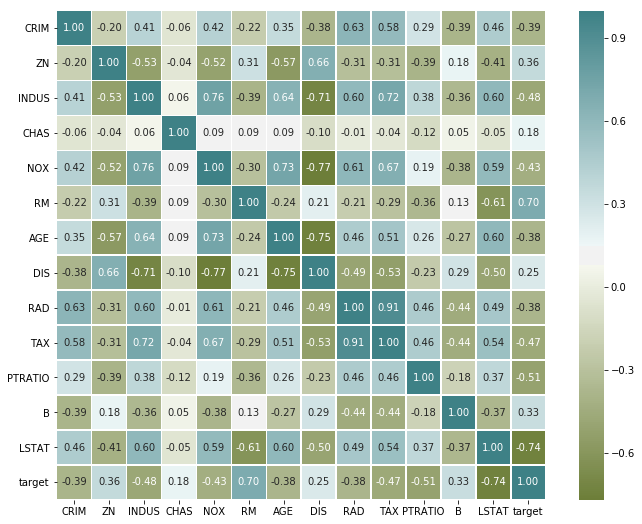

In [20]:
import seaborn as sns

data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])

plt.figure(figsize=(12,9))

corr = data1.corr()
sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [21]:
data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Попробуйте убрать из данных признаки с наименьшей корреляцией с target (1, 2 или 3 признака) и обучить линейную регрессию на оставшихся признаках. Как изменилось качество?

In [24]:
#your code here

# Задание 1 (домашнее)

Визуализируйте процесс обучения линейной регрессии, а именно:

любым способом сделайте анимацию процесса обучения, т.е. выводите регрессионную линию через 10, 20, 30 и т.д. шагов градиентного спуска. Если получится сделать анимацию - хорошо. Но можно просто вывести несколько графиков подряд.

In [25]:
#your code here

# Задание 2 (домашнее)

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

1. Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

2. Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test,
обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

3. Посмотрите на матрицу корреляций факторов и целевой переменной. 
Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

Если есть факторы, слабо коррелирующие с таргетом, удалите их.

Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

In [26]:
#your code here